# Introduction to Data Mining & Machine Learning

Main Idea: ho n samples da dei dati, voglio predire proprietà di dati che non conosco. Vale in una, ma anche in più dimensioni.

Common concept throughout this part: **training sets** e **test sets**. Il primo set di dati, si usa per fare delle previsioni sul secondo set.

Categorie di machine learning:
1. Supervised Learning: il mio training set ha delle **labels**.
    * Classification: posso separare i dati in **classi** e usare i labels dai training sets per predire labels per i test set.
    * Clustering: non ho labels "discrete" dai training sets, ma ho una proprietà "continua".
        
2. Unsupervised Learning: non ho **labels**, ma vorrei *empiricamente* capire qualcosa dai dati.
    * Clustering: i dati sono divisi in gruppi distinti?
    * Density Estimation: come sono distribuiti i dati nello spazio dei parametri?
    * Dimensionality Reduction: riesco a visualizzare i dati "proiettandoli" in uno spazio a 2-3 dimensioni, e a capire qualcosa?

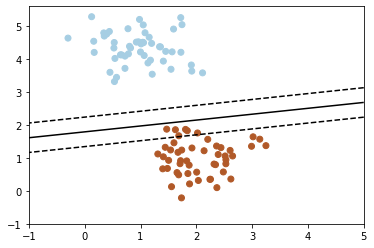

In [1]:
## sk-learn classification

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBacked.figure_format='retina'

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=2*50, centers=2, random_state=0, cluster_std=0.50)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    #p = clf.decision_function([x1, x2])
    p = clf.decision_function(np.array([x1,x2]).reshape(1,-1))
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'

#ax = plt.axes()
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

Ok, ho costruito due "blob" di roba e ho usato sklearn per fargli "imparare" che ci sono due blob. Se ora butto dentro un punto senza specificare se sia blu o rosso, dovrei "capire" da solo di che colore sia, a seconda di dove si trova!

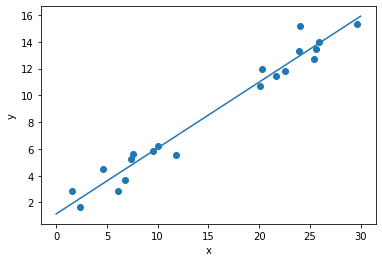

In [2]:
# sk-learn regression

from sklearn.linear_model import LinearRegression

a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)

#GTR: Note that these all do the same thing
#print x[:, None]
#print x[:, np.newaxis]
#print x.reshape(-1,1)
#But only the first one actually is readable

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.show()

Anche in questo caso ho "imparato" che il fit è quello, partendo dal mio test sample.

Posso usare un test sample su questa funzione di fit

Posso fare una previsione: dato x, chi è la y?

### Data Representation in Scikit-learn

Most ML algorithms "vogliono" i dati in due forme: vettore di dimensione N, o matrice. In particolare, o usi `numpy` o usi `scipy.sparse`, e la SIZE dev'essere del tipo `[n_samples,n_features]`.

* n_samples: è il numero di sasmples. Ogni sample è UN item da processare / classificare. Può essere letteralmente qualsiasi cosa, da un documento ad una foto, da un csv ad un fits file...

* n_features: è il numero di features / distinct traits che posso usare per descrivere ciascun oggetto in modo QUANTITATIVO. Solitamente le feature sono numeri reali, ma puoi avere anche delle bool, o dei valori discreti ( vedi sopra! )

**Il numero di features va fissato in anticipo.** Per evitare problemi con la memoria, `scipy.sparse` è il formato migliore per archiviare i dati.

##### A Simple Example: the Iris Dataset

Dati su tre tipi di Iris: Iris Setosa, Iris Versicolor, Iris Virginica.

- **Features/attributes in the Iris dataset:**
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

**Scikit-learn refers to the "labels" as "targets".  So, every time you see "target", just think "label" and it will make more sense.**

- **The target classes are:**
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Un'entry di iris.data è un array di lunghezza 4 contenente le quattro features che abbiamo stabilito prima, su petali e sepali. La dimensione totale di iris.data è un bel 150x4.

I target invece hanno dimensione 150x1, infatti sono un numero che va da 0 a 2 a seconda del tipo di Iris che sto guardando.

I dati sono 4-dimensionali (ogni Iris ha quattro parametri) ma posso visualizzarli due alla volta.

Text(0, 0.5, 'sepal width (cm)')

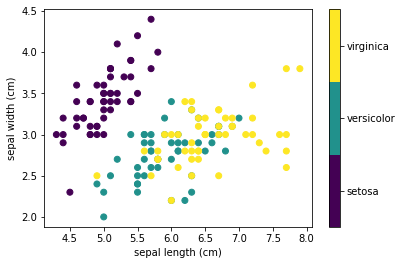

In [6]:
import numpy as np

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], 
            c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

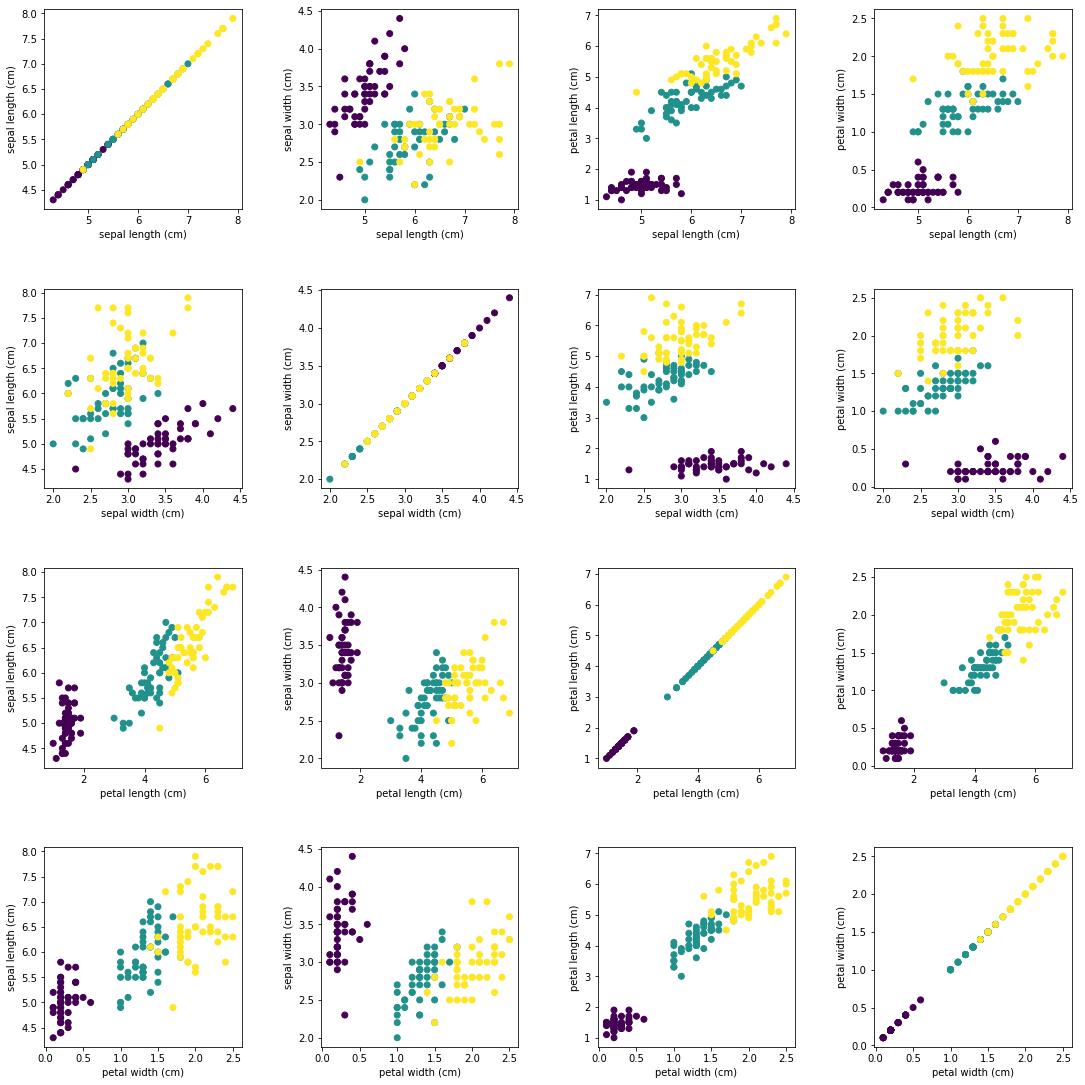

In [20]:
fig, ax = plt.subplots(4,4, figsize=(15,15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

for x_index in range(4):
    for y_index in range(4):
        ax[x_index,y_index].scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))
        ax[x_index,y_index].set_xlabel(iris.feature_names[x_index])
        ax[x_index,y_index].set_ylabel(iris.feature_names[y_index])

Vedi notebook di Gerosa per imparare come si importano i dataset. Puoi importarli sia da sklearn che da astroML!

---

# Basic Principles of Machine Learning

*Ogni algoritmo di scikit-learn* genera un **ESTIMATOR** object. I **parametri** dell'estimatore possono essere settati quando è INSTANZIATO, e hanno dei valori di default edeguati.

Vedi notebook: `LinearRegression` da `sklearn.linear_model`. Lo ISTANZIA, perché gli dà in pasto normalize=True, e poi prepara un semplice data set.

A quel punto vuole *fittare* il training sample e vorrebbe *fare previsioni* sul test sample.

**ATTENZIONE**: le training features vanno date in pasto a sklearn come multidimensional-array, anche se ho solo UNA dimensione! Nel caso di questo fit, ho x e y che sono di shape (10,), mentre dovrei darglielo di shape (10,1). 

Standard Syntax:
* X è il multi-dimensional training array
* y è l'array delle training "labels" ( che può essere continuo )

Se la mia x è 1-D, deve divenare N-D. Vedila così: hai un vettore di numeri reali di lunghezza N? Lo trasformi in una matrice ad N righe e 1 colonna. Essenzialmente, hai fatto preso il vettore trasposto.

y =  5.0 x + 3.0
y =  4.986199256632239 x + 3.9582255685524395


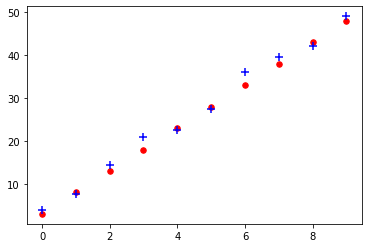

In [78]:
model = LinearRegression(normalize=True)

x_train = np.arange(10)
y_train = 5*x_train + 3

from scipy.stats import norm
np.random.seed(42)
y_err = np.array(norm(0,2).rvs(len(x_train)))
y_real = 5*x_train + 3 + y_err

X = x_train.reshape(len(x_train),1)
# model.fit(x_train,y_train) ## WROOOOONG!
model.fit(X,y_train)
print('y = ', model.coef_[0], 'x +', model.intercept_)

model.fit(X,y_real)
print('y = ', model.coef_[0], 'x +', model.intercept_)

plt.scatter(x_train,y_train, c='red', marker='o', s=30)
plt.scatter(x_train,y_real, c='blue', marker='+', s=50)

## Supervised Learning: Classification and Regression

Dataset: ha sia **features** che **labels**.

Task: costruire un ESTIMATOR che sia in grado di prevedere la *label* di un oggetto, datao un set di features!

Esempio banale: so le misure della mia Iris: è target 0,1, o 2?

> Nel supervised learning ci sono una o più proprietà sconosciute di un oggetto che devono essere determinae da altre quantità osservate.

Il supervised learning si può dividere in due categorie:

1. Classification: labels discrete
2. Regression: labels continue

##### k Nearest Neighbors: kNN

Data una nuova, sconosciuta osservazione, cerco nel reference database quali hanno le features più vicine e ci associo la clasase predominante. Guardiamo con le Iris:

In [94]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

Xtest = np.atleast_2d([3,5,4,2]) 
Xtest.shape

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict(Xtest)
print(result)
print(iris.target_names[result]) # Complete such that the name rather than the number is output.

print(knn.predict_proba(Xtest))

[1]
['versicolor']
[[0.  0.8 0.2]]


In [96]:
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features
X = iris.data[:, :2]  
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
model =  neighbors.KNeighborsClassifier(n_neighbors)
model.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#Now overplot the training points                     
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
"""

"\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.colors import ListedColormap\nfrom sklearn import neighbors, datasets\n\nn_neighbors = 15\n\n# import some data to play with\niris = datasets.load_iris()\n\n# we only take the first two features\nX = iris.data[:, :2]  \ny = iris.target\n\nh = .02  # step size in the mesh\n\n# Create color maps\ncmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])\ncmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])\n\n# we create an instance of Neighbours Classifier and fit the data.\nmodel =  neighbors.KNeighborsClassifier(n_neighbors)\nmodel.fit(X, y)\n\n# Plot the decision boundary. For that, we will assign a color to each\n# point in the mesh [x_min, x_max]x[y_min, y_max].\n\nx_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1\ny_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                     np.arange(y_min, y_max, h))\n\nZ = model.predict(np.c_[xx.r

Bene, ho visto un po' come funziona e posso fare probabilistic estimates di "Ehi, di che specie può essere la mia iris?" "Probabilmente è versicolor!"

Nel notebook puoi vedere la stessa cosa, fatta con SVC: Support Vector Machine Classification; per ora, guardiamo la magia e poi capiremo come funziona.

##### Regression Example

Esempio estremamente di base: fittare una linea a dei dati. Molto, molto comune in fisica ( in logscale, hai quasi sempre le power law ).

Guarda i notebook per ulteriori dettagli.

## Unsupervised Learning: Dimensionality Reduction and Clustering

Dati: non hanno labels! Voglio trovare similarities tra gli oggetti analizzati. In un certo senso, "ricavo i labels dai dati".

Unsupervised Learning:
1. Dimensionality Reduction
2. Clustering
3. Density Estimation 

##### Dimensionality Reduction: Principle Component Analysis (PCA)

Dimension Reduction Technique che si usa per trovare le combinazioni di variabili che spiegano "the most variance".

Considero il dataset delle Iris: non riesco a vederlo in 2D, ci sono 4 features. Però voglio una combinazione di due parametri, che mi separa per bene le tre famiglie di fiori. Guarda il notebook per vedere cosa fa. => HA MASSIMIZZATO LA SEPARAZIONE DELLE CLASSI, mescolando i parametri!

> Nota che, pur non avento le features, l'algoritmo è riuscito a "capire" che ci sono diversi dataset dentro il mio iris.data!

##### Clustering: K-means

Il clustering raggruppa osservazioni che sono omogenee rispetto ad un criterio assegnato, trovando "blocchi" nei miei dati.

NB. il criterio che usi deve servire ad evidenziare qualcosa, altrimenti è inutile!

Usiamo KMeans da sklearn: gli do in pasto la X_reduced del mio iris.data, e vediamo che succede? Identifico tre cluster! Prova a confrontarli con il risultato reale, e guarda che roba D:

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface (API) across all methods, and we'll see examples of these below. Given a scikit-learn ***estimator*** object named `model`, the following methods are available:

- Available in **all Estimators**
     - `model.fit()`: fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` [e.g., `model.fit(X, y)`].  For unsupervised learning applications, this accepts only a single argument, the data `X` [e.g., `model.fit(X)`].
  
  
- Available in **supervised estimators**
    - `model.predict()`: given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` [e.g., `model.predict(X_new)`], and returns the learned label for each object in the array.
    - `model.predict_proba()`: For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
    - `model.score()`: For classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
    
    
- Available in **unsupervised estimators**
    - `model.transform()`: given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
    - `model.fit_transform()`: some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Model Validation

Un altro aspetto fondamentale di ML.

> Model Validation = Determinare quanto bene il tuo modello generalizzerà dai dati di training ai futuri dati unlabeled.

Guardiamo nel notebook un esempio con *nearest neighbor classifier*: prendo tutto il training set, e per qualsiasi q.tà unknown, restituisce il label del training point più vicino.

Nota che nel notebook ho n_neighbors=1

##### Domanda per Gerosa: nel caso delle iris ma non solo, come posso scegliere il mio numero di neighbors nel modo più adeguato possibile? 

Confusion Matrix: frequency of inputs and outputs. "Numero di osservazioni NOTE nella colonna i, PREVISTE nella colonna j" (?) (?) (?)

Benissimo, costruiamo training set e test set con *train_test_split*?

Molto meglio. A questo punto vedi che c'è un po' di confusione tra la seconda e la terza specie, perché ho un termine non-diagonale!

> E' ESTREMAMENTE IMPORTANTE FARE UN TRAIN/TEST SPLIT QUANDO VALUTO I MIEI MODELLI, PERCHE' LA PERFORMANCE DEL MIO CLASSIFICATORE POTREBBE SEMBRARE MIGLIORE DI QUANTO EFFETTIVAMENTE E'